In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('manufacturing_defect_dataset (1).csv')

FileNotFoundError: [Errno 2] No such file or directory: 'manufacturing_defect_dataset (1).csv'

In [13]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.shape

(3240, 17)

<Axes: >

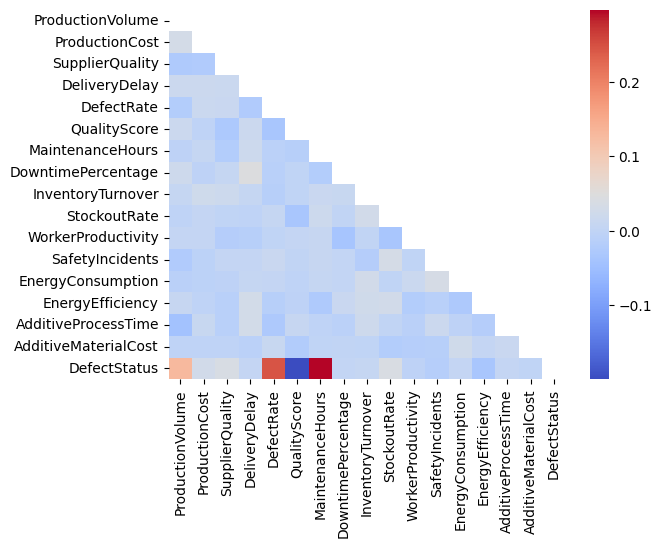

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap = cmap)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RANDOM_STATE = 100 # Ensure results are reproducible

In [ ]:
X = df.drop('DefectStatus', axis = 1)
y = df['DefectStatus']

#Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split data in to training (60%), cross validation (20%) and test (20%) sets
X_train, X_, y_train, y_ = train_test_split(X_scaled,y,test_size=0.4, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size = 0.5, random_state = 1)

In [ ]:
samples_acc_train_list = []
samples_acc_cv_list = []

min_samples_split_list = np.linspace(2,300, 20).astype(int)
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=min_samples_split, random_state = RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_cv = model.predict(X_cv)
    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_cv = accuracy_score(y_cv, predictions_cv)
    samples_acc_train_list.append(accuracy_train)
    samples_acc_cv_list.append(accuracy_cv)


In [ ]:
depth_acc_train_list = []
depth_acc_cv_list = []

max_depth_list = np.linspace(1,30,20).astype(int)
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth, random_state = RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_cv = model.predict(X_cv)
    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_cv = accuracy_score(y_cv, predictions_cv)
    depth_acc_train_list.append(accuracy_train)
    depth_acc_cv_list.append(accuracy_cv)

Text(0, 0.5, 'Accuracy')

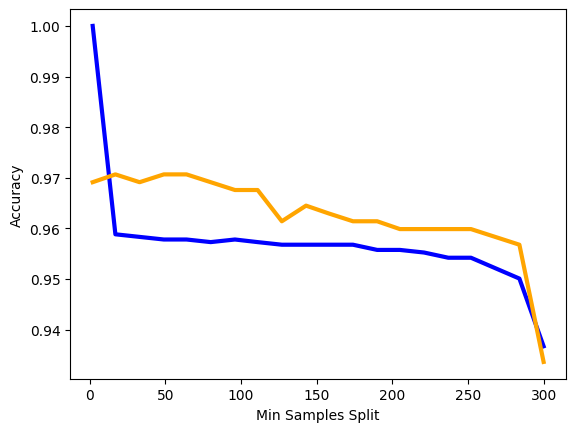

In [ ]:
plt.plot(min_samples_split_list, samples_acc_train_list, color = 'blue', label = 'Train acc', linewidth = 3)
plt.plot(min_samples_split_list, samples_acc_cv_list, color = 'orange', label = 'CV acc', linewidth = 3)
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

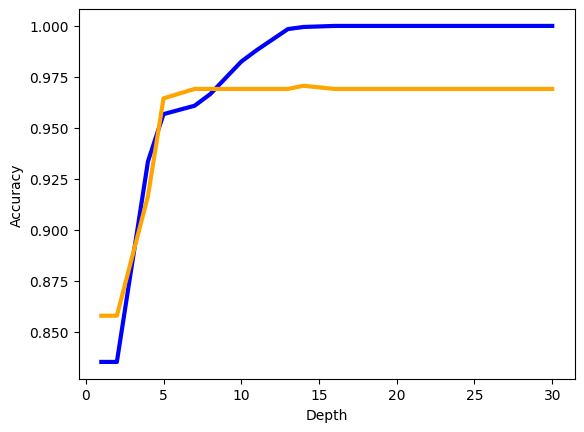

In [ ]:
plt.plot(max_depth_list, depth_acc_train_list, color = 'blue', label = 'Train acc', linewidth = 3)
plt.plot(max_depth_list, depth_acc_cv_list, color = 'orange', label = 'CV acc', linewidth = 3)
plt.xlabel('Depth')
plt.ylabel('Accuracy')

In [ ]:
random_forest_model = RandomForestClassifier(min_samples_split = 50, max_depth = 7, random_state = RANDOM_STATE).fit(X_train, y_train)

In [ ]:
y_pred = random_forest_model.predict(X_test)
print(f"Random forest model accuracy: {accuracy_score(y_test,y_pred):.3f}")

Random forest model accuracy: 0.955


In [ ]:
feature_importances = random_forest_model.feature_importances_
idx = np.argsort(feature_importances)[::-1]
features = X.columns

Text(0.5, 1.0, 'Feature Importance')

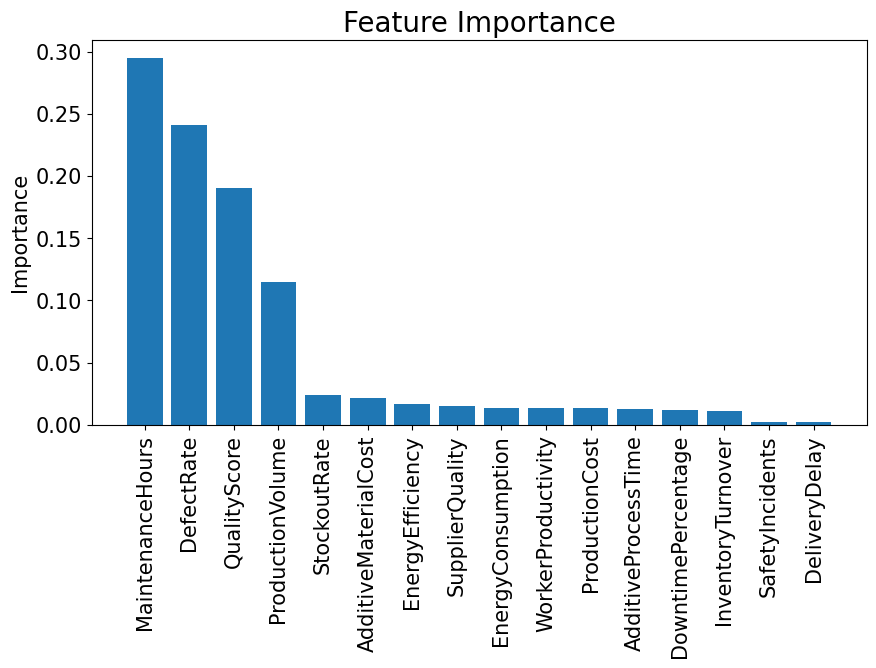

In [ ]:
plt.figure(figsize = (10,5))
plt.bar(features[idx], feature_importances[idx])
plt.xticks(rotation = 90, fontsize = 15);
plt.yticks(fontsize = 15)
plt.ylabel('Importance', fontsize = 15)
plt.title('Feature Importance', fontsize = 20)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgboost_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1, random_state = RANDOM_STATE, early_stopping_rounds = 10)
xgboost_model.fit(X_train, y_train, eval_set = [(X_cv, y_cv)])

[0]	validation_0-logloss:0.36869
[1]	validation_0-logloss:0.33059
[2]	validation_0-logloss:0.30184
[3]	validation_0-logloss:0.27877
[4]	validation_0-logloss:0.25944
[5]	validation_0-logloss:0.24327
[6]	validation_0-logloss:0.22952
[7]	validation_0-logloss:0.21853
[8]	validation_0-logloss:0.20918
[9]	validation_0-logloss:0.20084
[10]	validation_0-logloss:0.19393
[11]	validation_0-logloss:0.18799
[12]	validation_0-logloss:0.18281
[13]	validation_0-logloss:0.17823
[14]	validation_0-logloss:0.17350
[15]	validation_0-logloss:0.16976
[16]	validation_0-logloss:0.16613
[17]	validation_0-logloss:0.16299
[18]	validation_0-logloss:0.16050
[19]	validation_0-logloss:0.15787
[20]	validation_0-logloss:0.15647
[21]	validation_0-logloss:0.15451
[22]	validation_0-logloss:0.15349
[23]	validation_0-logloss:0.15205
[24]	validation_0-logloss:0.15116
[25]	validation_0-logloss:0.15003
[26]	validation_0-logloss:0.14882
[27]	validation_0-logloss:0.14772
[28]	validation_0-logloss:0.14734
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [ ]:
print(f"XGBoost test set accuracy score: {accuracy_score(xgboost_model.predict(X_test),y_test):.3f}")

XGBoost test set accuracy score: 0.957
